### I am taking help of CampusX SIR's notebook help in this. [Notebook](https://github.com/campusx-official/dsmp-capstone-project/blob/master/feature-engineering.ipynb)

In [1]:
from ast import literal_eval
import re

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_colwidth', 100)

In [3]:
df = pd.read_csv('data/processed/flats.csv')
print(df.shape)

(2785, 28)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2785 entries, 0 to 2784
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    2785 non-null   object 
 1   link             2785 non-null   object 
 2   society          2785 non-null   object 
 3   price            2785 non-null   float64
 4   area             2785 non-null   object 
 5   areaWithType     2785 non-null   object 
 6   bedRoom          2785 non-null   int64  
 7   bathroom         2785 non-null   int64  
 8   balcony          2785 non-null   int64  
 9   additionalRoom   2785 non-null   object 
 10  address          2782 non-null   object 
 11  facing           2037 non-null   object 
 12  agePossession    2784 non-null   object 
 13  nearbyLocations  2785 non-null   object 
 14  description      2785 non-null   object 
 15  furnishDetails   2785 non-null   object 
 16  features         2785 non-null   object 
 17  property_id   

In [5]:
df.isnull().sum()

property_name        0
link                 0
society              0
price                0
area                 0
areaWithType         0
bedRoom              0
bathroom             0
balcony              0
additionalRoom       0
address              3
facing             748
agePossession        1
nearbyLocations      0
description          0
furnishDetails       0
features             0
property_id          0
nthFloor             1
totalFloor           1
Transportation       0
Education            0
Healthcare           0
Shopping             0
Dining               0
Accommodation        0
Entertainment        0
Service              0
dtype: int64

## society `>>` sector

1. Extract sector number from this column.
2. There are many properties which are **not labeled with sector number**. So I need to hard code it.

In [6]:
# Sir's method of extracting sectors

df['sector_by_sir'] = (
    df['address']
    .str.split(',')
    .str.get(0)
    .str.replace(r'sector.*', '', regex=True)
    .str.strip()
    .apply(lambda x: x if x else np.nan)
)

In [7]:
df['sector_by_sir'].nunique()

707

In [8]:
df['sector_by_sir'].unique()[:80]

array(['krishna colony', '46b', 'sohna', nan, 'dwarka expressway gurgaon',
       'h 23', 'flat no. :- 301', 'senate court', 'g04', 'godrej habitat',
       'new palam vihar', 'tower a-4', 't 3', '101', 'c 488', '609',
       'flat no 201', 'tower 5', 'dlf phase 4', 'a253', 'plot no. 833',
       '1422 bahadurgarh', 'h1202', 'tower 6', '802/b5', '#1101', 'near',
       '3bhk', 'laxman vihar', 'f 150/b', 'godrej oasis', '401',
       'emaar palm premier', 'tower 2 floor 4th', '4302', '621/622',
       'tower 18', 's-68/3', 'sushant lok phase 1', 'tower - k',
       'bhagwati sadan', 'n54c', 'sohna road', 'ashok vihar phase 2',
       'rajiv colony', 'garauli kalan', 'bhawani enclave', 'j002',
       'iffco chowk', 'b33', '1057', 'b1101', 'tower a', '104', '604',
       'a5-3102', 'gwal pahari', 'plot 833 flat 202',
       'central park flower valley', 'malibu town',
       'golf course extension road', 'chakkarpur', 'tower 6 402',
       's-70/1', 'flat no. c-014', 'flat no. 002', 'bloc

In [9]:
df['sector_by_sir'].isnull().sum()

1375

In [10]:
def zfill_(match: re.Match[str]):
    return match.group(1).zfill(3)

In [11]:
# My method of extracting sectors

df['sector_by_me'] = (
    df['address']
    .astype(str)
    .add(' ')
    .add(df['property_name'])
    .add(' ')
    .add(df['description'].str.lower().astype(str))
    .str.lower()
    .str.replace(r'\W+', ' ', regex=True)
    .str.extract(r'(sector \d+\w?)')[0]
)

In [12]:
df['sector_by_me'].nunique()

99

In [13]:
df[
    df['address']
    .astype(str)
    .add(' ')
    .add(df['description'].str.lower().astype(str))
    .str.contains('sector')
    == False
]['address'].shape

(309,)

In [14]:
df['sector_by_me'].unique()

array([nan, 'sector 61', 'sector 92', 'sector 36', 'sector 104',
       'sector 88b', 'sector 78', 'sector 81', 'sector 79', 'sector 33',
       'sector 90', 'sector 108', 'sector 62', 'sector 102', 'sector 89',
       'sector 113', 'sector 65', 'sector 48', 'sector 37c', 'sector 3',
       'sector 43', 'sector 88a', 'sector 68', 'sector 109', 'sector 106',
       'sector 82', 'sector 85', 'sector 82a', 'sector 10a', 'sector 1a',
       'sector 4', 'sector 84', 'sector 71', 'sector 7', 'sector 77',
       'sector 37d', 'sector 67a', 'sector 57', 'sector 95', 'sector 99a',
       'sector 103', 'sector 49', 'sector 30', 'sector 86', 'sector 66',
       'sector 15', 'sector 93', 'sector 22', 'sector 63a', 'sector 95a',
       'sector 52', 'sector 67', 'sector 107', 'sector 12a', 'sector 2',
       'sector 99', 'sector 91', 'sector 1', 'sector 70', 'sector 70a',
       'sector 54', 'sector 111', 'sector 41', 'sector 12', 'sector 73',
       'sector 56', 'sector 83', 'sector 53', 'sector 72

In [15]:
df['sector_by_me'].isnull().sum()

310

In [16]:
# Merge sector_by_sir and sector_by_me columns and then do the extra works

df['sector'] = (
    df['sector_by_me']
    .fillna('')
    .add(' ')
    .add(df['sector_by_sir'].fillna(''))
    .str.replace(r'(sector \d+\w?)( .*)', r'\1', regex=True)
    .str.strip()
    .apply(lambda x: x if x else np.nan)
)

In [17]:
df['sector'].isnull().sum()

0

In [18]:
df['sector'].nunique()

235

In [19]:
df['sector'].unique()[:80]

array(['krishna colony', '46b', 'sohna', 'sector 61', 'sector 92',
       'sector 36', 'dwarka expressway gurgaon', 'sector 104',
       'sector 88b', 'sector 78', 'sector 81', 'sector 79', 'sector 33',
       'sector 90', 'sector 108', 'sector 62', 'sector 102', 'sector 89',
       'sector 113', 'sector 65', 'sector 48', 'sector 37c', 'sector 3',
       'new palam vihar', 'sector 43', 'sector 88a', 'sector 68',
       'sector 109', 't 3', 'sector 106', 'sector 82', 'flat no 201',
       'sector 85', 'sector 82a', 'dlf phase 4', 'a253', 'sector 10a',
       'sector 1a', 'sector 4', 'sector 84', 'sector 71', 'sector 7',
       'h1202', 'sector 77', 'sector 37d', 'sector 67a', 'sector 57',
       'sector 95', 'sector 99a', 'sector 103', 'sector 49', 'sector 30',
       'sector 86', 'sector 66', 'sector 15', 'laxman vihar', 'f 150/b',
       'sector 93', 'sector 22', 'sector 63a', 'sector 95a', '621/622',
       'tower 18', 'sector 52', 'sector 67', 'sushant lok phase 1',
       'sector 1

In [20]:
extra_sectors_naming = {
    '46b': 'sector 46b',
    'dharam colony': 'sector 12',
    'krishna colony': 'sector 7',
    'suncity': 'sector 54',
    'prem nagar': 'sector 13',
    'mg road': 'sector 28',
    'gandhi nagar': 'sector 28',
    'laxmi garden': 'sector 11',
    'shakti nagar': 'sector 11',
    'baldev nagar': 'sector 7',
    'shivpuri': 'sector 7',
    'garhi harsaru': 'sector 17',
    'imt manesar': 'sector 4',
    'adarsh nagar': 'sector 12',
    'shivaji nagar': 'sector 11',
    'bhim nagar': 'sector 6',
    'madanpuri': 'sector 7',
    'saraswati vihar': 'sector 28',
    'arjun nagar': 'sector 8',
    'ravi nagar': 'sector 9',
    'vishnu garden': 'sector 105',
    'bhondsi': 'sector 11',
    'surya vihar': 'sector 21',
    'devilal colony': 'sector 9',
    'valley view estate': 'sector 54',
    'mehrauli  road': 'sector 14',
    'jyoti park': 'sector 7',
    'ansal plaza': 'sector 23',
    'dayanand colony': 'sector 6',
    'sushant lok phase 2': 'sector 55',
    'chakkarpur': 'sector 28',
    'greenwood city': 'sector 45',
    'subhash nagar': 'sector 12',
    'malibu town': 'sector 47',
    'surat nagar 1': 'sector 104',
    'mianwali colony': 'sector 12',
    'jacobpura': 'sector 12',
    'rajiv nagar': 'sector 13',
    'rajiv colony': 'sector 33',
    'ashok vihar': 'sector 3',
    'dlf phase 1': 'sector 26',
    'metro station': 'sector 26',
    'nirvana country': 'sector 50',
    'new palam vihar': 'sector 110',
    'palam vihar': 'sector 2',
    'dlf phase 2': 'sector 25',
    'sushant lok phase 1': 'sector 43',
    'laxman vihar': 'sector 4',
    'dlf phase 4': 'sector 28',
    'dlf phase 3': 'sector 24',
    'sushant lok phase 3': 'sector 57',
    'dlf phase 5': 'sector 43',
    'rajendra park': 'sector 105',
    'uppals southend': 'sector 49',
    'sohna': 'sector 33',
    'ashok vihar phase 3 extension': 'sector 5',
    'south city 1': 'sector 41',
    'ashok vihar phase 2': 'sector 5',
    "garauli kalan": 'sector 45',
    "bhawani enclave": 'sector 56',
    "iffco chowk": 'sector 29',
    'sai kunj': 'sector 110a',
    'manesar': 'sector 4',
    'shankar vihar': 'sector 104',
    'patel nagar': 'sector 15',
    'dwarka expressway': 'sector 88a',
    'gwal pahari': 'sector 2',
    'paras quartier': 'sector 29',
    'ambience island': 'sector 24',
    'lajpat nagar': 'sector 29',
    'mehrauli': 'sector 29',
    'central park flower valley': 'sector 32',
}

In [21]:
def handle_sector(x: str) -> str | float:
    if isinstance(x, float):
        return np.nan

    for k, v in extra_sectors_naming.items():
        if k in x:
            return v
    else:
        return x

In [22]:
df['sector'] = df['sector'].apply(handle_sector).str.replace(r'(\d+)', zfill_, regex=True)

In [23]:
df['sector'].unique()

array(['sector 007', 'sector 046b', 'sector 033', 'sector 061',
       'sector 092', 'sector 036', 'sector 088a', 'sector 104',
       'sector 088b', 'sector 078', 'sector 081', 'sector 079',
       'sector 090', 'sector 108', 'sector 062', 'sector 102',
       'sector 089', 'sector 113', 'sector 065', 'sector 048',
       'sector 037c', 'sector 003', 'sector 110', 'sector 043',
       'sector 068', 'sector 109', 't 003', 'sector 106', 'sector 082',
       'flat no 201', 'sector 085', 'sector 082a', 'sector 028', 'a253',
       'sector 010a', 'sector 001a', 'sector 004', 'sector 084',
       'sector 071', 'h1202', 'sector 077', 'sector 037d', 'sector 067a',
       'sector 057', 'sector 095', 'sector 099a', 'sector 103',
       'sector 049', 'sector 030', 'sector 086', 'sector 066',
       'sector 015', 'f 150/b', 'sector 093', 'sector 022', 'sector 063a',
       'sector 095a', '621/622', 'tower 018', 'sector 052', 'sector 067',
       'sector 107', 'sector 012a', 'sector 002', 'sector 

In [24]:
drop_rows = df[(df['sector'].str.contains('sector') == False)].index
len(drop_rows)

128

In [25]:
df.loc[drop_rows, 'sector'].sample(15)

2294                          m914
1365                           000
1104                         004th
1445                          0001
198     golf course extension road
1451                           001
374                       t008-003
2609                      2690/030
2620                           092
2745                      flat 002
2524                      010/1204
2210               flat t002 -1801
2594                      m g road
2343                       012a004
297                          j-026
Name: sector, dtype: object

In [26]:
# I am going to drop the extra rows which are not labeled with sector number
df.drop(index=drop_rows, inplace=True)
df.shape

(2657, 31)

## area

In [27]:
df['area'].sample(7)

2350    ₹ 26,875/sq.ft.
2324     ₹ 8,432/sq.ft.
813     ₹ 10,489/sq.ft.
617      ₹ 6,580/sq.ft.
2444     ₹ 9,615/sq.ft.
438      ₹ 6,921/sq.ft.
1139     ₹ 8,445/sq.ft.
Name: area, dtype: object

In [28]:
df['area'][df['area'].str.contains('sq.ft.') == False]

Series([], Name: area, dtype: object)

In [29]:
df['area'] = df['area'].str.replace(',', '').str.extract(r'(\d+)/sq.ft.').astype('float')

In [30]:
df['area'].isnull().sum()

0

In [31]:
df['price_per_sqft'] = df['price'].mul(1_00_000).div(df['area']).astype('int')

## areaWithType

In [32]:
df['areaWithType'].sample(5)

1131    Super Built up area 1970(183.02 sq.m.)
2492          Carpet area: 1350 (125.42 sq.m.)
870     Super Built up area 1717(159.51 sq.m.)
714      Super Built up area 2072(192.5 sq.m.)
442         Built Up area: 1650 (153.29 sq.m.)
Name: areaWithType, dtype: object

In [33]:
print(
    'Super Built up area -',
    df[df['areaWithType'].str.contains('Super Built up area')].shape[0],
)
print(
    'Built up area -',
    df[df['areaWithType'].str.contains('Built Up area')].shape[0],
)
print('Carpet area -', df[df['areaWithType'].str.contains('Carpet area')].shape[0])

Super Built up area - 1751
Built up area - 850
Carpet area - 1619


In [34]:
df['built_up_area'] = df['areaWithType'].str.extract(r'Built Up area: (\d+.?\d+?)').astype(float)
df['carpet_area'] = df['areaWithType'].str.extract(r'Carpet area: (\d+.?\d+?)').astype(float)
df['super_built_up_area'] = (
    df['areaWithType'].str.replace('(', ' ').str.extract(r'Super Built up area (\d+)').astype(float)
)

In [35]:
df[['area', 'super_built_up_area', 'built_up_area', 'carpet_area']].sample(10)

,area,super_built_up_area,built_up_area,carpet_area
922,8818.0,1385.0,1200.0,1100.0
2679,7097.0,2325.0,NaN,NaN
2473,8290.0,NaN,NaN,361.8
854,10799.0,1852.0,NaN,NaN
46,10005.0,NaN,NaN,1829.0
2746,8571.0,NaN,3150.0,NaN
1271,16858.0,2343.0,NaN,1512.0
1055,12802.0,NaN,NaN,2109.0
1352,11333.0,1942.0,1700.0,1500.0
2500,7302.0,NaN,NaN,301.2


## additionalRoom

In [36]:
df['additionalRoom'] = df['additionalRoom'].str.lower()

In [37]:
additionalRooms = ['study room', 'servant room', 'store room', 'pooja room', 'others']

for col in additionalRooms:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [38]:
df.sample(5)[['additionalRoom', 'study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
1148,pooja room,0,0,0,1,0
1842,"servant room,others",0,1,0,0,1
892,servant room,0,1,0,0,0
2214,not available,0,0,0,0,0
1824,study room,1,0,0,0,0


## agePossession

In [39]:
df['agePossession'].isnull().sum()

1

In [40]:
df['agePossession'].unique()

array(['1 to 5 Year Old', '10+ Year Old', '0 to 1 Year Old', 'Dec 2023',
       'Under Construction', 'undefined', 'Jun 2024', 'Mar 2024',
       'Dec 2025', 'By 2023', '5 to 10 Year Old', 'Sep 2025', 'Jan 2024',
       'Within 6 months', 'Jan 2027', 'Dec 2024', 'Oct 2024', 'Nov 2023',
       'Jul 2026', 'Feb 2024', 'Oct 2023', 'Jan 2025', 'Aug 2023', nan,
       'By 2024', 'Apr 2024', 'Nov 2025', 'Dec 2026', 'Within 3 months',
       'Apr 2026', 'By 2025', 'Jul 2027', 'Sep 2023', 'By 2027',
       'Jan 2026', 'May 2024', 'Nov 2024', 'Aug 2024', 'Mar 2025',
       'Jul 2024', 'Jul 2025', 'Sep 2027', 'Jun 2025', 'Jan 2028',
       'Aug 2026', 'Mar 2026', 'Aug 2025', 'Oct 2025'], dtype=object)

In [41]:
def categorize_age_possession(value: str) -> str:
    if pd.isna(value):
        return "undefined"
    if "0 to 1 Year Old" == value or "Within 6 months" == value or "Within 3 months" == value:
        return "New Property"
    if "1 to 5 Year Old" == value:
        return "Relatively New"
    if "5 to 10 Year Old" == value:
        return "Moderately Old"
    if "10+ Year Old" == value:
        return "Old Property"
    if "Under Construction" == value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])  # <<- Raises ValueError
        return "Under Construction"
    except ValueError:
        return "undefined"

In [42]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [43]:
df['agePossession'].value_counts()

agePossession
Relatively New        1375
New Property           450
Moderately Old         313
Under Construction     220
undefined              199
Old Property           100
Name: count, dtype: int64

In [44]:
df[df['agePossession'].str.contains('undefined') == True].sample(3)

,property_name,link,society,price,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,...,sector,price_per_sqft,built_up_area,carpet_area,super_built_up_area,study room,servant room,store room,pooja room,others
2288,2 BHK Flat in Sector 95 Gurgaon,2-bhk-bedroom-apartment-flat-for-sale-in-sector-95-gurgaon-637-sq-ft-r1-spid-Z65720898,Ramsons Kshitij,35.0,5495.0,Built Up area: 637 (59.18 sq.m.),2,2,0,not available,...,sector 095,636,637.0,NaN,NaN,0,0,0,0,0
196,2 BHK Flat in Sohna,2-bhk-bedroom-apartment-flat-for-sale-in-hcbs-sports-ville-sohna-gurgaon-743-sq-ft-spid-S68368426,HCBS Sports Ville,29.5,3970.0,Built Up area: 743 (69.03 sq.m.)Carpet area: 519 sq.ft. (48.22 sq.m.),2,2,1,not available,...,sector 033,743,743.0,519.0,NaN,0,0,0,0,0
33,2 BHK Flat in Sector 90 Gurgaon,2-bhk-bedroom-apartment-flat-for-sale-in-shree-vardhman-flora-sector-90-gurgaon-1300-sq-ft-spid-...,Shree Vardhman Flora,75.0,5769.0,Carpet area: 1300 (120.77 sq.m.),2,2,3,not available,...,sector 090,1300,NaN,1300.0,NaN,0,0,0,0,0


For now, I found a relation between `ageposession` and `additionalRoom` columns is that wherever **additionalRoom** is `'not available` the **ageposession** is `'undefined'`.

## furnishDetails

In [45]:
df['furnishDetails'] = df['furnishDetails'].apply(literal_eval)

In [46]:
df['furnishDetails'].sample(7)

981     [4 Wardrobe, 7 Fan, 1 Exhaust Fan, 3 Geyser, 7 Light, 1 Modular Kitchen, 1 Chimney, 1 Curtains, ...
582     [4 Fan, 1 Exhaust Fan, 1 Geyser, 5 Light, 1 Curtains, 1 Modular Kitchen, 3 Wardrobe, No AC, No B...
2312    [2 Wardrobe, No AC, No Bed, No Chimney, No Curtains, No Dining Table, No Exhaust Fan, No Fan, No...
1340    [3 Fan, 1 Exhaust Fan, 10 Light, 2 AC, No Bed, No Chimney, No Curtains, No Dining Table, No Geys...
1228                                                                                                     []
1395    [4 Fan, 1 Exhaust Fan, 10 Light, 2 AC, 1 Modular Kitchen, No Bed, No Chimney, No Curtains, No Di...
1503                                                                                                     []
Name: furnishDetails, dtype: object

In [47]:
distinct_furnish = df['furnishDetails'].explode().str.split(' ', n=1).str.get(-1).unique().tolist()
distinct_furnish = [i for i in distinct_furnish if isinstance(i, str)]
len(distinct_furnish)

18

In [48]:
distinct_furnish

['Fan',
 'Light',
 'Wardrobe',
 'AC',
 'Bed',
 'Chimney',
 'Curtains',
 'Dining Table',
 'Exhaust Fan',
 'Geyser',
 'Modular Kitchen',
 'Microwave',
 'Fridge',
 'Sofa',
 'Stove',
 'TV',
 'Washing Machine',
 'Water Purifier']

In [49]:
df['furnishDetails'] = df['furnishDetails'].astype(str)
furnish_df = pd.DataFrame()

for furnish in distinct_furnish:
    furnish_df[furnish] = (
        df['furnishDetails'].str.extract(fr'(\d+) {furnish}').fillna(0).astype(int)
    )

In [50]:
furnish_df.sample(10)

,Fan,Light,Wardrobe,AC,Bed,Chimney,Curtains,Dining Table,Exhaust Fan,Geyser,Modular Kitchen,Microwave,Fridge,Sofa,Stove,TV,Washing Machine,Water Purifier
505,10,22,6,6,0,1,0,0,1,6,1,0,0,1,0,0,0,1
1928,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2048,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
742,5,9,3,0,0,1,1,0,1,3,1,0,0,0,1,0,0,0
310,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
485,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1621,5,6,0,6,0,1,0,0,0,0,1,0,0,0,1,0,0,0
100,3,3,0,3,0,1,0,0,1,2,1,0,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
scaler = StandardScaler()
furnish_scaled = scaler.fit_transform(furnish_df)

In [52]:
cluster_range = range(1, 11)
wcss_reduced = []

for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(furnish_scaled)
    wcss_reduced.append(kmeans.inertia_)

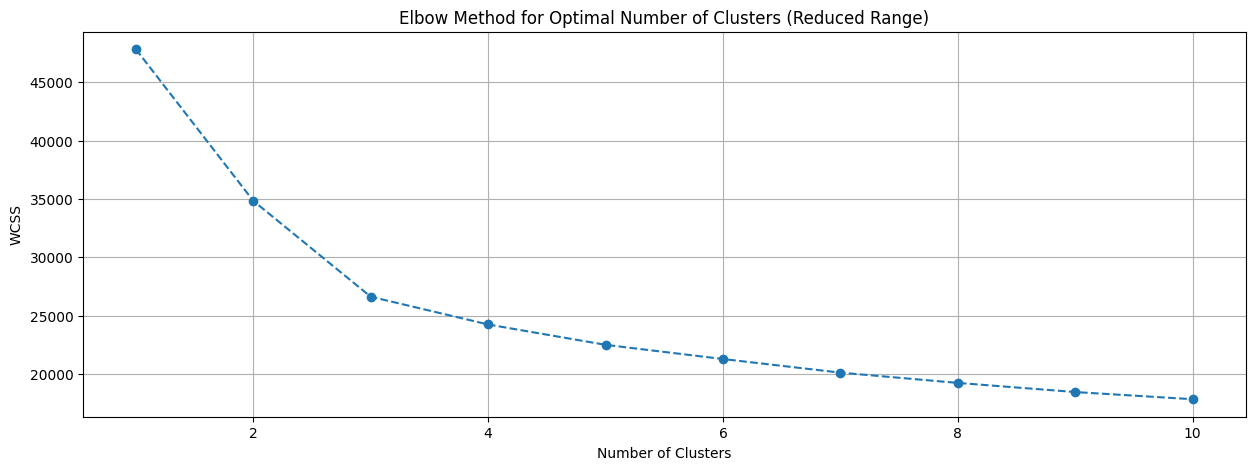

In [53]:
# Plot the results
plt.figure(figsize=(15, 5))
plt.plot(cluster_range, wcss_reduced, marker='o', linestyle='--')

plt.title('Elbow Method for Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [54]:
best_n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=best_n_clusters, init='k-means++', n_init=10, random_state=42)
kmeans.fit(furnish_scaled)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(furnish_scaled)

In [55]:
df['furnish_type'] = cluster_assignments

In [56]:
df[['furnishDetails', 'furnish_type']]

,furnishDetails,furnish_type
0,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Ta...",1
1,"['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '3 Light', '1 Curtains', '1 Chimney', '1 Mo...",2
2,[],1
3,[],1
4,[],1
...,...,...
2780,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Ta...",1
2781,"['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Geyser', '3 Light', '1 Curtains', '1 Chimney', '1 Mo...",2
2782,[],1
2783,[],1


**furnish_type**

- `0` -> **unfurnished**
- `1` -> **semifurnished**
- `2` -> **furnished**

## features

In the feature engineering session of the course Sir's method got failed becuse the newly created feature `luxury_score` of flats has not a signoficant co-relation with `price` target feature.

**That's why I am not going to follow the Sir's method. I am goning to find my way to deal with this column.**

In [57]:
df['features'] = df['features'].apply(literal_eval)

In [58]:
df['features'].explode().unique()

array(['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)',
       'Water Storage', 'Visitor Parking', 'Maintenance Staff', 'Park',
       'Power Back-up', 'Intercom Facility', 'Swimming Pool',
       'Fitness Centre / GYM', 'Club house / Community Center',
       'Private Garden / Terrace', 'False Ceiling Lighting',
       'Natural Light', 'Airy Rooms', 'Water softening plant', nan,
       'Security Personnel', 'Internet/wi-fi connectivity',
       'Rain Water Harvesting', 'Separate entry for servant room',
       'Spacious Interiors', 'Waste Disposal', 'Piped-gas',
       'Shopping Centre', 'Water purifier', 'No open drainage around',
       'Low Density Society', 'Bank Attached Property',
       'High Ceiling Height', 'Centrally Air Conditioned',
       'Recently Renovated'], dtype=object)

In [59]:
apartments = pd.read_csv('data/appartments.csv', usecols=['PropertyName', 'TopFacilities'])
print(apartments.shape)
apartments.head(2)

(247, 2)


,PropertyName,TopFacilities
0,Smartworld One DXP,"['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club ..."
1,M3M Crown,"['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading..."


In [60]:
apartments['TopFacilities'].isnull().sum()

0

In [61]:
drop_rows = apartments[apartments['TopFacilities'].str.startswith('[') == False].index
apartments.drop(index=drop_rows, inplace=True)
print('No. of rows dropped:', len(drop_rows))

No. of rows dropped: 1


In [62]:
apartments['TopFacilities'] = apartments['TopFacilities'].apply(literal_eval)

In [63]:
null_features_df = df[['society', 'features']][
    df['features'].apply(lambda x: x if x else np.nan).isnull()
].copy()
null_features_df['society'] = null_features_df['society'].str.lower()

null_features_df.head()

,society,features
4,parkwood westend,[]
5,signature global infinity mall,[]
6,the cocoon,[]
12,supertech araville,[]
13,godrej,[]


In [64]:
apartments['PropertyName'] = apartments['PropertyName'].str.lower()

In [65]:
temp_df = null_features_df.merge(
    apartments,
    left_on='society',
    right_on='PropertyName',
    how='left',
)

In [66]:
df.loc[null_features_df.index, 'features'] = temp_df['TopFacilities'].values

In [67]:
df['features'].isnull().sum()

209

## General Step

In [68]:
df.columns

Index(['property_name', 'link', 'society', 'price', 'area', 'areaWithType',
       'bedRoom', 'bathroom', 'balcony', 'additionalRoom', 'address', 'facing',
       'agePossession', 'nearbyLocations', 'description', 'furnishDetails',
       'features', 'property_id', 'nthFloor', 'totalFloor', 'Transportation',
       'Education', 'Healthcare', 'Shopping', 'Dining', 'Accommodation',
       'Entertainment', 'Service', 'sector_by_sir', 'sector_by_me', 'sector',
       'price_per_sqft', 'built_up_area', 'carpet_area', 'super_built_up_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnish_type'],
      dtype='object')

In [69]:
df.isnull().sum()

property_name             0
link                      0
society                   0
price                     0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
address                   3
facing                  707
agePossession             0
nearbyLocations           0
description               0
furnishDetails            0
features                209
property_id               0
nthFloor                  1
totalFloor                1
Transportation            0
Education                 0
Healthcare                0
Shopping                  0
Dining                    0
Accommodation             0
Entertainment             0
Service                   0
sector_by_sir          1375
sector_by_me            182
sector                    0
price_per_sqft            0
built_up_area          1807
carpet_area            1038
super_built_up_area     906
study room          

In [70]:
df.drop(
    columns=[
        'areaWithType',
        'additionalRoom',
        'address',
        'furnishDetails',
        'sector_by_sir',
        'sector_by_me',
    ],
    inplace=True,
)

In [71]:
pd.set_option('display.max_columns', None)
df.sample(5)

,property_name,link,society,price,area,bedRoom,bathroom,balcony,facing,agePossession,nearbyLocations,description,features,property_id,nthFloor,totalFloor,Transportation,Education,Healthcare,Shopping,Dining,Accommodation,Entertainment,Service,sector,price_per_sqft,built_up_area,carpet_area,super_built_up_area,study room,servant room,store room,pooja room,others,furnish_type
1800,2 BHK Flat in Sector 86 Gurgaon,2-bhk-bedroom-apartment-flat-for-sale-in-microtek-greenburg-sector-86-gurgaon-850-sq-ft-spid-Z70...,Microtek Greenburg,130.0,15294.0,2,3,3,North-East,Relatively New,"['SS Omnia Mall', 'National Highway 8', 'Dwarka Expressway', 'Sidheshwar School', 'Dronacharya C...","This 2 bhk flat is located in microtek greenburg, which houses some of the most spacious flats i...","[Intercom Facility, Lift(s), Swimming Pool, Park, Piped-gas, Shopping Centre, Fitness Centre / G...",Z70028220,5.0,21.0,3,3,1,1,0,1,0,0,sector 086,850,NaN,850.0,NaN,1,0,0,0,0,2
1323,4 BHK Flat in Sector 85 Gurgaon,4-bhk-bedroom-apartment-flat-for-sale-in-ss-the-leaf-sector-85-gurgaon-2812-sq-ft-spid-T69980168,SS The Leaf,205.0,7290.0,4,4,-1,North-East,Relatively New,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'NH 08', 'Pataudi Road', 'D...",This lovely 4 bhk apartment/flat in sector 85 gurgaon is available for sale in one of gurgaon's ...,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance St...",T69980168,4.0,15.0,5,2,1,1,0,1,2,0,sector 085,2812,2500.0,2250.0,2812.0,0,1,0,0,0,2
824,3 BHK Flat in Sector 69 Gurgaon,3-bhk-bedroom-apartment-flat-for-sale-in-tulip-violet-sector-69-gurgaon-1568-sq-ft-spid-F69429866,Tulip Violet,132.0,8411.0,3,3,1,South-East,Relatively New,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School...",Park facing\nSun facing\nPool facing \nBest price in the market.\n Additional details :Piped gas...,"[Power Back-up, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, Pip...",F69429866,12.0,14.0,3,2,1,1,0,1,1,0,sector 069,1569,NaN,NaN,1568.0,0,0,0,1,0,1
177,3 BHK Flat in Sector 70 Gurgaon,3-bhk-bedroom-apartment-flat-for-sale-in-krrish-florence-estate-sector-70-gurgaon-1865-sq-ft-r8-...,Krrish Florence Estate,125.0,6703.0,3,3,3,North-East,Under Construction,"['Omaxe Gurgaon Mall', 'NH248A', 'The Vivekananda School', 'Suraj PG Degree College, Sec -75', '...",Residential apartment for sell.The property comes with a good construction quality which ages ju...,"[Intercom Facility, Lift(s), Feng Shui / Vaastu Compliant, Swimming Pool, Security Personnel, Ma...",H33897213,18.0,25.0,2,2,2,1,0,0,0,0,sector 070,1864,NaN,NaN,1865.0,0,0,0,0,0,1
1538,5 BHK Flat in Sector 49 Gurgaon,5-bhk-bedroom-apartment-flat-for-sale-in-orchid-petals-sector-49-gurgaon-4115-sq-ft-spid-K69732128,Orchid Petals,452.0,10984.0,5,5,-1,West,Moderately Old,"['Sapphire Mall', 'Omaxe City Centre', 'BigBazaar', 'Sohna Rd', 'Kinder Care Playschool', 'Kanga...","This beautiful 5 bhk penthouse sector 49 gurgaon is situated in orchid petals, one of the popula...","[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance St...",K69732128,14.0,14.0,1,2,3,1,0,1,1,1,sector 049,4115,NaN,NaN,4115.0,1,1,0,1,0,1


## Export dataset

In [72]:
df.to_csv('data/processed/flats.csv', index=False)